<a href="https://colab.research.google.com/github/Malatesh-kalled/python_machine_learning/blob/main/logisticreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cost after  0 iteration is :  0.6931471805599454
cost after  10000 iteration is :  0.49652777693895306
cost after  20000 iteration is :  0.46674868550666
cost after  30000 iteration is :  0.45687787762434423
cost after  40000 iteration is :  0.45288994293089646
cost after  50000 iteration is :  0.45093260252226425
cost after  60000 iteration is :  0.4497708749009468
cost after  70000 iteration is :  0.4489640829216279
cost after  80000 iteration is :  0.44834126966124827
cost after  90000 iteration is :  0.44783045246935776


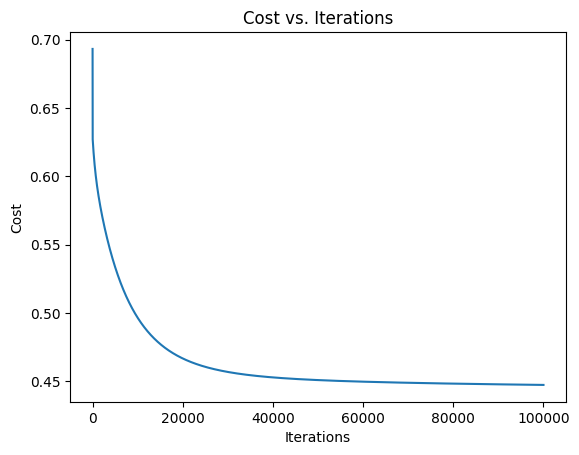

Accuracy of the model is :  91.39 %


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
X_train = pd.read_csv("/content/drive/MyDrive/train_X.csv")
Y_train = pd.read_csv("/content/drive/MyDrive/train_Y.csv")
X_test = pd.read_csv("/content/drive/MyDrive/test_X (1).csv")
Y_test = pd.read_csv("/content/drive/MyDrive/test_Y.csv")

# Drop 'Id' column
X_train = X_train.drop("Id", axis=1)
Y_train = Y_train.drop("Id", axis=1)
X_test = X_test.drop("Id", axis=1)
Y_test = Y_test.drop("Id", axis=1)

# Convert to NumPy arrays
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

# Reshape data
X_train = X_train.T
Y_train = Y_train.reshape(1, X_train.shape[1])
X_test = X_test.T
Y_test = Y_test.reshape(1, X_test.shape[1])

# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the logistic regression model
def model(X, Y, learning_rate, iterations):
    m = X_train.shape[1]
    n = X_train.shape[0]
    W = np.zeros((n, 1))
    B = 0
    cost_list = []
    for i in range(iterations):
        Z = np.dot(W.T, X) + B
        Y_pred = sigmoid(Z)
        cost = -(1/m) * np.sum(Y*np.log(Y_pred) + (1-Y)*np.log(1-Y_pred))
        dW = (1/m) * np.dot(Y_pred - Y, X.T)
        dB = (1/m) * np.sum(Y_pred - Y)
        W = W - learning_rate * dW.T
        B = B - learning_rate * dB
        cost_list.append(cost)
        if(i % (iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
    return W, B, cost_list

iterations = 100000
learning_rate = 0.0015
W, B, cost_list = model(X_train, Y_train, learning_rate=learning_rate, iterations=iterations)

# Plot the cost over iterations
plt.plot(np.arange(iterations), cost_list)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()


def accuracy(X, Y, W, B):

    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)

    A = A > 0.5  #probability more than 0.5 is considered 1

    A = np.array(A, dtype = 'int64')

    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100

    print("Accuracy of the model is : ", round(acc, 2), "%")
accuracy(X_test, Y_test, W, B)